<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW5_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
df = california_housing.frame

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# **3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['MedHouseVal'], axis=1)

In [ ]:
y = df['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_1_test = r2_score(y_test, model.predict(X_test))
print(r2_score_1_test)

0.5757877060324508


In [ ]:
r2_score_1_train = r2_score(y_train, model.predict(X_train))
print(r2_score_1_train)

0.6125511913966952


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
RMSE_1_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(RMSE_1_test)

0.7455813830127764


In [ ]:
RMSE_1_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(RMSE_1_train)

0.7196757085831575


# **5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ящик с усами по целевому признаку')

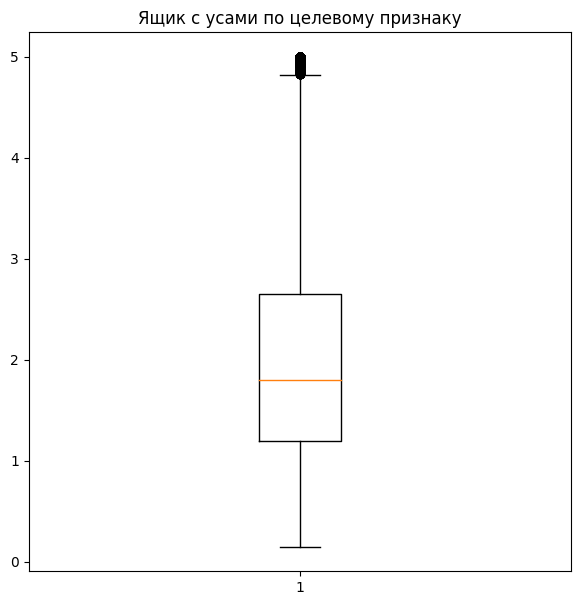

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df['MedHouseVal'])
plt.title("Ящик с усами по целевому признаку")

Text(0.5, 1.0, 'График распределения целевой переменной')

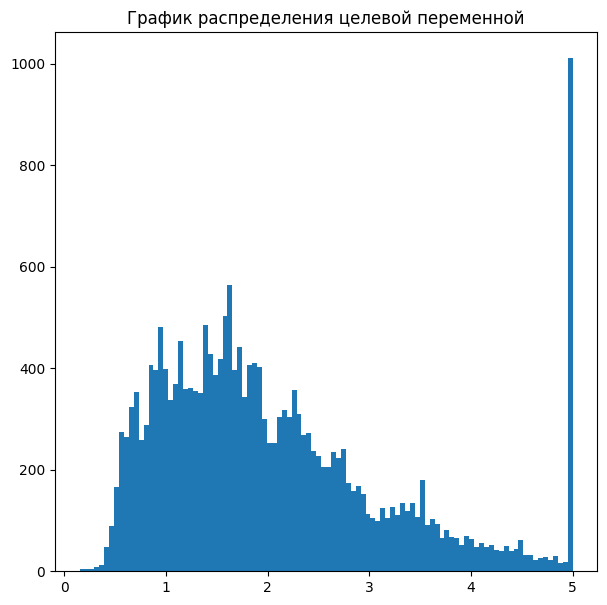

In [ ]:
plt.figure(figsize=(7, 7))
plt.hist(df['MedHouseVal'], bins = 100)
plt.title("График распределения целевой переменной")

**Да, выбросы присутствут в районе 5**

# **6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.**

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='RdYlGn')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**a. Сделайте выводы.**

1. Очень ярковыраженная корреляция между признаками AveRooms и AveBedrms. Последний можно исключить, так как с целевой переменной у него напротив корряция ниже

2. Так же заметна корреляиция между Latitude и Longitude, но здесь, вероятно лучше оставить оба признака

3. Так же имеется слабовыреженная корреляция между MedInc и AveRooms, а так же между HouseAge и Population. У признака AveRooms в целом неплохая корреляция с целевым, поэтому пока можно его оставить (при том, что мы убрали схожий признак в п.1), а в паре HouseAge/Population можно убрать Population.

**b. Удалите признаки на основании полученных значений, выводов.**

In [ ]:
X1 = X.drop(['AveBedrms', 'Population'], axis=1)

**c. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
r2_score_2_test = r2_score(y_test, model.predict(X1_test))
print(r2_score_2_test)

0.5823077951522642


In [ ]:
r2_score_2_train = r2_score(y_train, model.predict(X1_train))
print(r2_score_2_train)

0.5995166482669017


In [ ]:
RMSE_2_test = np.sqrt(mean_squared_error(y_test, model.predict(X1_test)))
print(RMSE_2_test)

0.7398294501935632


In [ ]:
RMSE_2_train = np.sqrt(mean_squared_error(y_train, model.predict(X1_train)))
print(RMSE_2_train)

0.731681227571958


# **7. Исследуйте оставленные признаки на выбросы.**

Text(0.5, 1.0, 'Ящик с усами по MedInc')

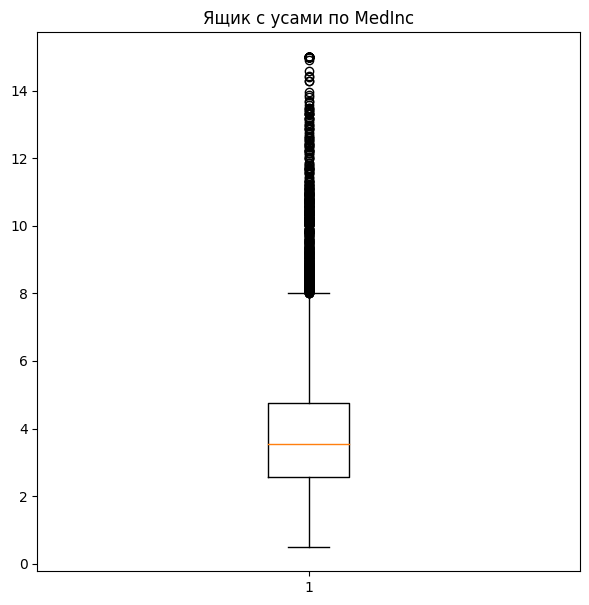

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df['MedInc'])
plt.title("Ящик с усами по MedInc")

Text(0.5, 1.0, 'Ящик с усами по HouseAge')

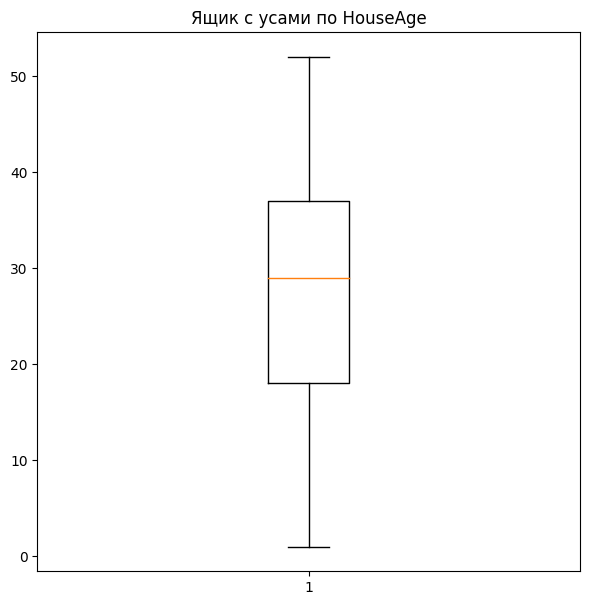

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df['HouseAge'])
plt.title("Ящик с усами по HouseAge")

Text(0.5, 1.0, 'Ящик с усами по AveRooms')

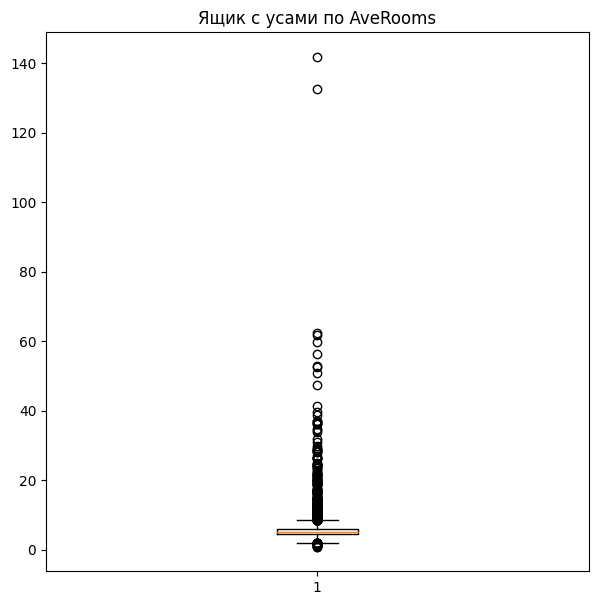

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df['AveRooms'])
plt.title("Ящик с усами по AveRooms")

Text(0.5, 1.0, 'Ящик с усами по AveOccup')

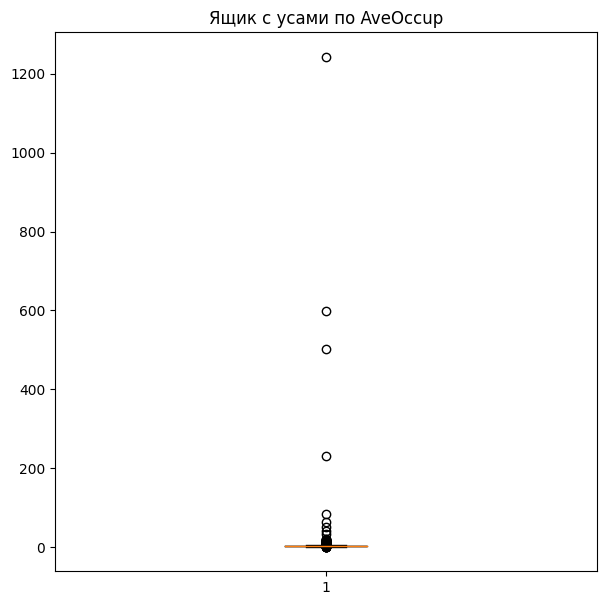

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df['AveOccup'])
plt.title("Ящик с усами по AveOccup")

In [ ]:
print(f"Минимальная широта {df['Latitude'].min()}")
print(f"Максимальная широта {df['Latitude'].max()}")
print(f"Минимальная долгота {df['Longitude'].min()}")
print(f"Максимальная долгота {df['Longitude'].max()}")

Минимальная широта 32.54
Максимальная широта 41.95
Минимальная долгота -124.35
Максимальная долгота -114.31


**a. Удалите выбросы в случае обнаружения.**

In [ ]:
df1 = df[(df['MedInc'] < 8) & (df['AveRooms'] < 80) & (df['AveOccup'] < 200)]

**b. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
X2 = df1.drop(['AveBedrms', 'Population', 'MedHouseVal'], axis=1)

In [ ]:
y2 = df1['MedHouseVal']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
model.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
r2_score_3_test = r2_score(y2_test, model.predict(X2_test))
print(r2_score_3_test)

0.5586099506133975


In [ ]:
r2_score_3_train = r2_score(y2_train, model.predict(X2_train))
print(r2_score_3_train)

0.5530507577075454


In [ ]:
RMSE_3_test = np.sqrt(mean_squared_error(y2_test, model.predict(X2_test)))
print(RMSE_3_test)

0.7157283650668688


In [ ]:
RMSE_3_train = np.sqrt(mean_squared_error(y2_train, model.predict(X2_train)))
print(RMSE_3_train)

0.7083939522656983


# **8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.**

In [ ]:
X3 = X2.copy()

In [ ]:
X3['HouseAge'] = np.sqrt(X3['HouseAge'])
X3['Latitude'] = np.log(X3['Latitude'])

In [ ]:
X3

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude
2,7.2574,7.211103,8.288136,2.802260,3.633631,-122.24
3,5.6431,7.211103,5.817352,2.547945,3.633631,-122.25
4,3.8462,7.211103,6.281853,2.181467,3.633631,-122.25
5,4.0368,7.211103,4.761658,2.139896,3.633631,-122.25
6,3.6591,7.211103,4.931907,2.128405,3.633367,-122.25
...,...,...,...,...,...,...
20635,1.5603,5.000000,5.045455,2.560606,3.675794,-121.09
20636,2.5568,4.242641,6.114035,3.122807,3.676047,-121.21
20637,1.7000,4.123106,5.205543,2.325635,3.674527,-121.22
20638,1.8672,4.242641,5.329513,2.123209,3.674527,-121.32


**a. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
X3_train, X3_test, y2_train, y2_test = train_test_split(X3, y2, test_size=0.2, random_state=42)

In [ ]:
model.fit(X3_train, y2_train)

LinearRegression()

In [ ]:
r2_score_4_test = r2_score(y2_test, model.predict(X3_test))
print(r2_score_4_test)

0.5569975438715056


In [ ]:
r2_score_4_train = r2_score(y2_train, model.predict(X3_train))
print(r2_score_4_train)

0.5525887084908407


In [ ]:
RMSE_4_test = np.sqrt(mean_squared_error(y2_test, model.predict(X3_test)))
print(RMSE_4_test)

0.7170344584255827


In [ ]:
RMSE_4_train = np.sqrt(mean_squared_error(y2_train, model.predict(X3_train)))
print(RMSE_4_train)

0.7087600210390058


# **9. Сформулируйте выводы по проделанной работе.**

**a. Кратко опишите какие преобразования были сделаны с данными.**

1. Для повторного расчета удалили переменные с выраженной корреляцией с другими переменными, но достаточно низкой с целевой (AveBedrms и Population)

2. Для третьего расчет удалили выбросы

3. Для четвертой итерации произвели мат преобразования (извелкли квадратный корень из переменной с возрастом дома и прологарифмировали широту)

**b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.**

In [ ]:
results = pd.DataFrame(columns=['Попытка', 'Коэффициент', 'Значение'])

In [ ]:
results.loc[len(results.index)] = [1, "R2_test", r2_score_1_test]
results.loc[len(results.index)] = [1, "R2_train", r2_score_1_train]
results.loc[len(results.index)] = [1, "RMSE_test", RMSE_1_test]
results.loc[len(results.index)] = [1, "RMSE_train", RMSE_1_test]
results.loc[len(results.index)] = [2, "R2_test", r2_score_2_test]
results.loc[len(results.index)] = [2, "R2_train", r2_score_2_train]
results.loc[len(results.index)] = [2, "RMSE_test", RMSE_2_test]
results.loc[len(results.index)] = [2, "RMSE_train", RMSE_2_test]
results.loc[len(results.index)] = [3, "R2_test", r2_score_3_test]
results.loc[len(results.index)] = [3, "R2_train", r2_score_3_train]
results.loc[len(results.index)] = [3, "RMSE_test", RMSE_3_test]
results.loc[len(results.index)] = [3, "RMSE_train", RMSE_3_test]
results.loc[len(results.index)] = [4, "R2_test", r2_score_4_test]
results.loc[len(results.index)] = [4, "R2_train", r2_score_4_train]
results.loc[len(results.index)] = [4, "RMSE_test", RMSE_4_test]
results.loc[len(results.index)] = [4, "RMSE_train", RMSE_4_test]

In [ ]:
results

,Попытка,Коэффициент,Значение
0,1,R2_test,0.575788
1,1,R2_train,0.612551
2,1,RMSE_test,0.745581
3,1,RMSE_train,0.745581
4,2,R2_test,0.582308
5,2,R2_train,0.599517
6,2,RMSE_test,0.739829
7,2,RMSE_train,0.739829
8,3,R2_test,0.558610
9,3,R2_train,0.553051


In [ ]:
table = pd.pivot_table(results, values='Значение', index=['Попытка'],
                       columns=['Коэффициент'], aggfunc="sum")

In [ ]:
table.sort_values(by = ['RMSE_test'], ascending=True)

Коэффициент,R2_test,R2_train,RMSE_test,RMSE_train
Попытка,,,,
3,0.558610,0.553051,0.715728,0.715728
4,0.556998,0.552589,0.717034,0.717034
2,0.582308,0.599517,0.739829,0.739829
1,0.575788,0.612551,0.745581,0.745581


In [ ]:
table.sort_values(by = ['R2_test'], ascending=True)

Коэффициент,R2_test,R2_train,RMSE_test,RMSE_train
Попытка,,,,
4,0.556998,0.552589,0.717034,0.717034
3,0.558610,0.553051,0.715728,0.715728
1,0.575788,0.612551,0.745581,0.745581
2,0.582308,0.599517,0.739829,0.739829


**c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.**

Лучший показатель достигается после чистки данных от выбросов. Последующие мат преобразования не дали значимого эффекта.

В целом достигнуто улучшение метрик, но коэффицент r2 остается всеравно довольно низким, что в целом говорит о плохом качестве модели. Следует дальше улучшать показатели